## HW1

first-order forward difference, second-order central difference and fourth-order central-difference

In [2]:
import numpy as np
import matplotlib.pyplot as plt

consider the function: 
$$
f(x) = \frac{\sin x}{x^3}
$$
and its true derivative function is:
$$
f^\prime(x) = \frac{\cos x}{x^3} - \frac{3\sin x}{x^4}
$$

In [3]:
def f(u):
    return np.sin(u) / u ** 3

def df(u):
    return np.cos(u) / u ** 3 - 3 * np.sin(u) / u ** 4

pre-define the grid

In [4]:
xli = np.linspace(3, 5, 100)
x = 4
# x[1:] - x[:-1] # latter term minus former one
grid = [1, 0.75, 0.5, 0.25, 0.1]

### First order difference

first order forward difference is defined as:
$$
\frac{\partial y}{\partial x} = \frac{y_{i+1,j}-y_{i,j}}{\Delta x} + o(\Delta x)
$$

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\l'
<>:28: SyntaxWarning: invalid escape sequence '\l'
<>:29: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\1071813478.py:16: SyntaxWarning: invalid escape sequence '\D'
  plt.plot([x, x+grid[i]], [f(x), yd], label='$\Delta x$=' + str(grid[i]))
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\1071813478.py:27: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\log(\Delta x)$")
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\1071813478.py:28: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\log(\epsilon)$")
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\1071813478.py:29: SyntaxWarning: invalid escape sequence '\D'
  p

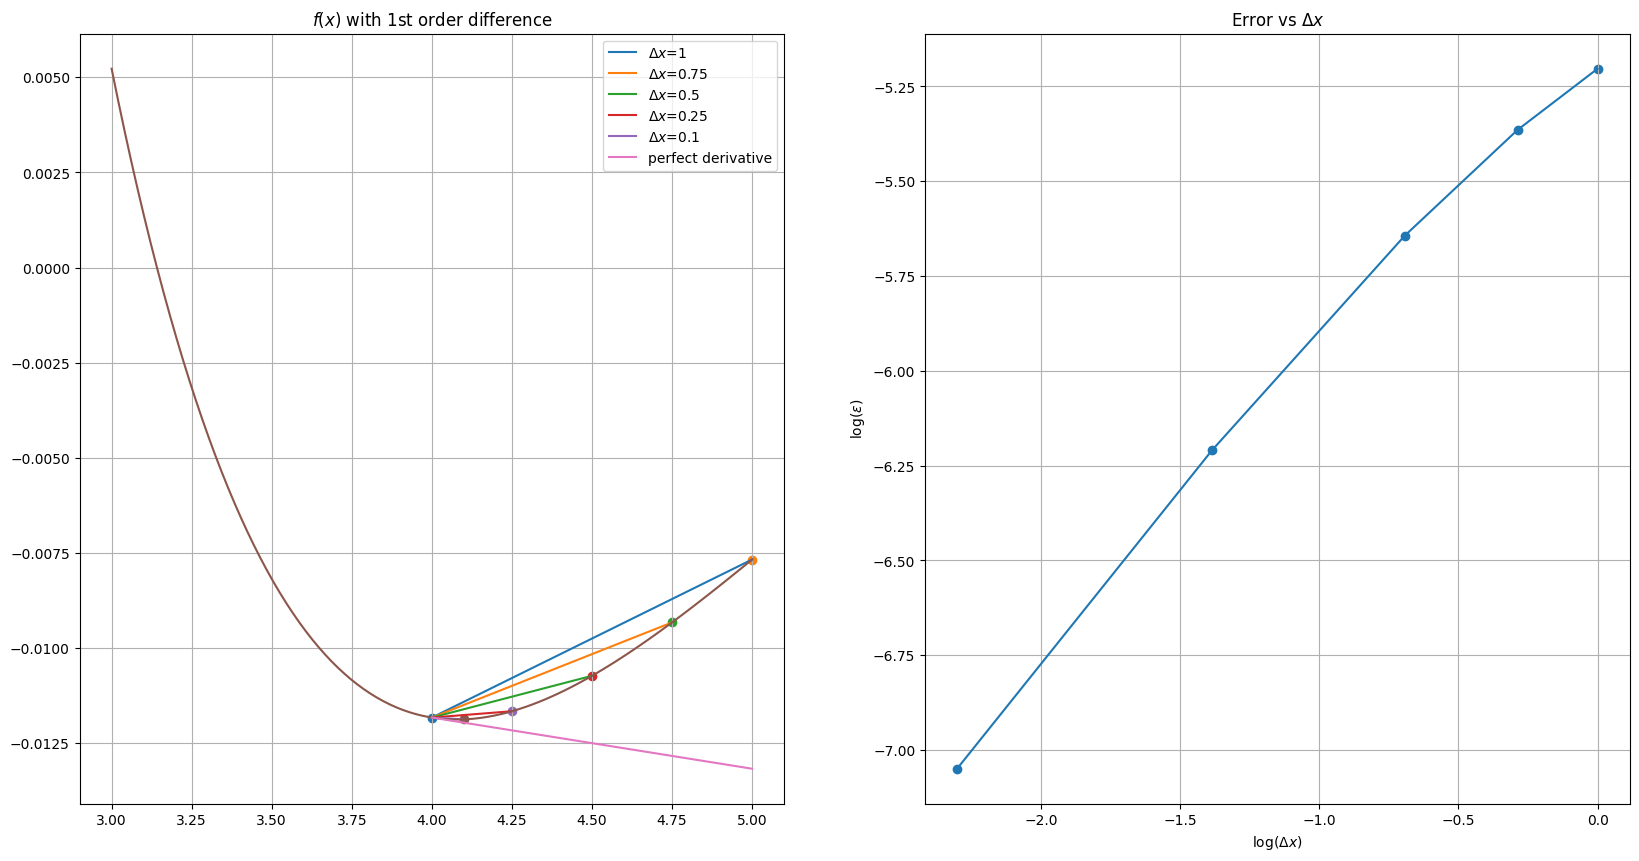

In [5]:
def first_diff(x, f, grid):
    return (f(x + grid) - f(x)) / grid

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(x, f(x))
errorli1 = []
for i in range(len(grid)):
    # grid = grid_size[i]
    # xd = x + grid
    # diff = (f(xd) - f(x)) / grid
    diff = first_diff(x, f, grid[i])
    yd = f(x) + diff * grid[i]
    error = np.abs(df(x) - diff)
    errorli1.append(error)
    plt.plot([x, x+grid[i]], [f(x), yd], label='$\Delta x$=' + str(grid[i]))
    plt.scatter(x+grid[i], yd)
plt.plot(xli, f(xli))
plt.plot([x, x+grid[0]], [f(x), f(x)+df(x)*+grid[0]], label='perfect derivative')
plt.legend()
plt.title("$f(x)$ with 1st order difference")
plt.grid(True)

plt.subplot(122)
plt.plot(np.log(grid), np.log(errorli1))
plt.scatter(np.log(grid), np.log(errorli1))
plt.xlabel("$\log(\Delta x)$")
plt.ylabel("$\log(\epsilon)$")
plt.title("Error vs $\Delta x$")
plt.grid(True)

here each colored line represents the difference start from $(x, f(x))$ to $(x+\Delta x, f(x)+diff*\Delta x)$. If the forward difference perfectly equals to analytical derivative, the direction of the diff line should be parallel to the derivative direction.

### second-order central difference

$$
\frac{\partial y}{\partial x} = \frac{y_{i+1,j}-y_{i-1,j}}{2\Delta x} +  o(\Delta x^2)
$$

In [16]:
def second_diff(x, f, grid):
    return (f(x + grid) - f(x - grid)) / (2 * grid)

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\662987293.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.plot([x, x+grid[i]], [f(x), yd], label='$\Delta x$=' + str(grid[i]))
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\662987293.py:25: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\log(\Delta x)$")
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\662987293.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\log(\epsilon)$")
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\662987293.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.t

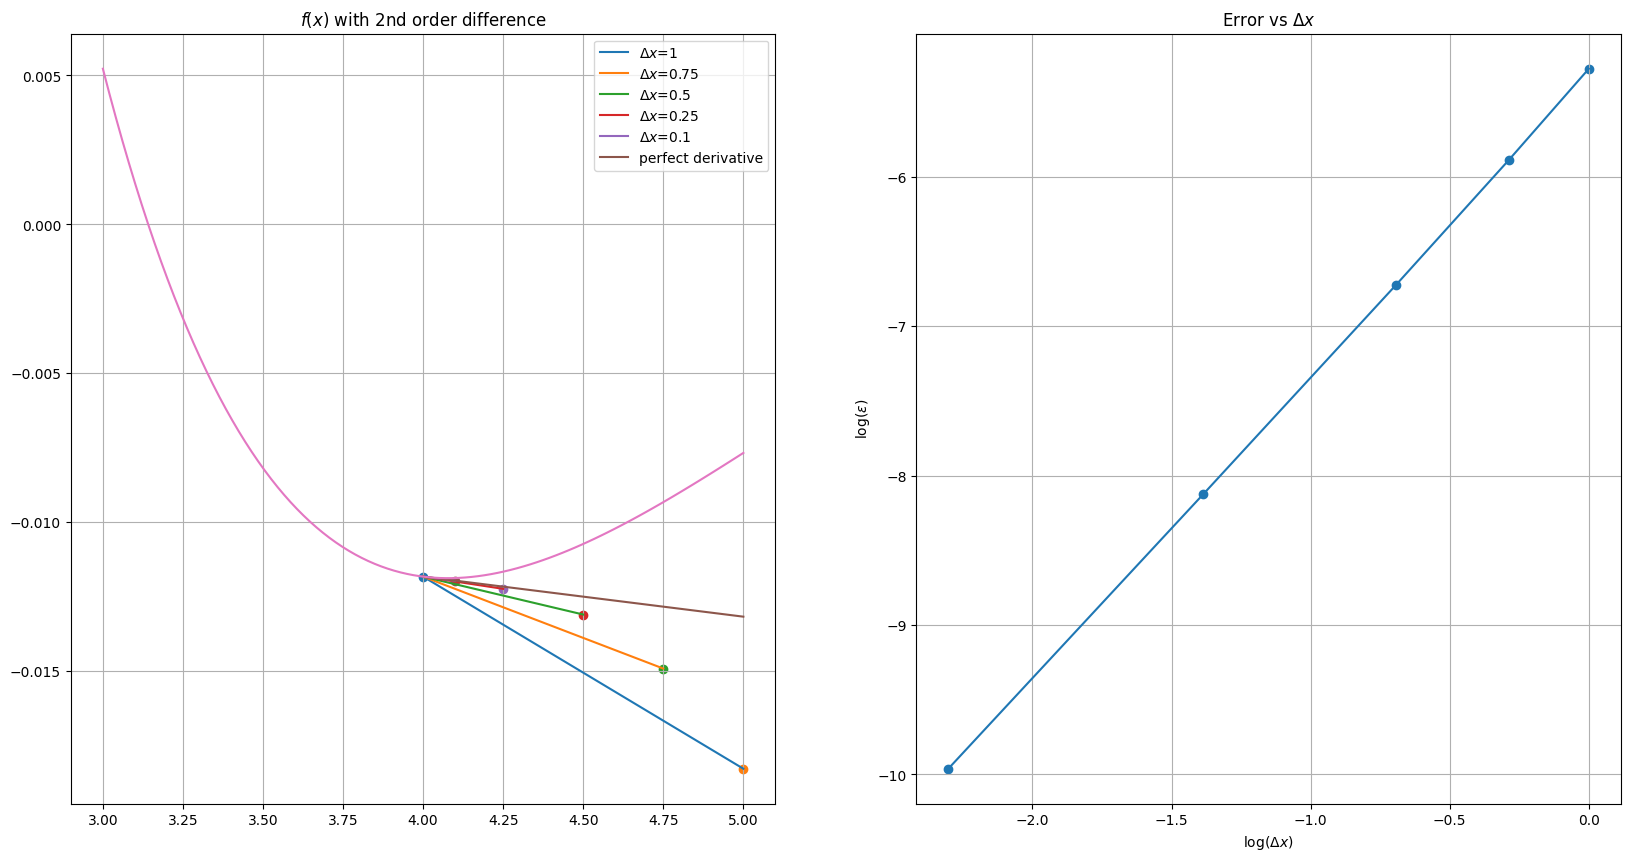

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(x, f(x))
errorli2 = []
for i in range(len(grid)):
    # grid = grid_size[i]
    # xd = x + grid
    # diff = (f(xd) - f(x)) / grid
    diff = second_diff(x, f, grid[i])
    yd = f(x) + diff * grid[i]
    error = np.abs(df(x) - diff)
    errorli2.append(error)
    plt.plot([x, x+grid[i]], [f(x), yd], label='$\Delta x$=' + str(grid[i]))
    # plt.arrow(x, f(x), grid[i], diff*grid[i], label='$\Delta x$=' + str(grid[i]), width=2e-10, head_width=2e-10)
    plt.scatter(x+grid[i], yd)
plt.plot([x, x+grid[0]], [f(x), f(x)+df(x)*+grid[0]], label='perfect derivative')
plt.plot(xli, f(xli))
plt.legend()
plt.title("$f(x)$ with 2nd order difference")
plt.grid(True)

plt.subplot(122)
plt.plot(np.log(grid), np.log(errorli2))
plt.scatter(np.log(grid), np.log(errorli2))
plt.xlabel("$\log(\Delta x)$")
plt.ylabel("$\log(\epsilon)$")
plt.title("Error vs $\Delta x$")
plt.grid(True)

$(x+\Delta x, f(x)+diff*\Delta x)$ looks closer to the perfect line, meaning that the calculated obliquity is more precise than 1st forward difference.

### Fourth order central difference (calculated by Pade Approximation)

under the condition of given $f_{j+2}$,$f_{j+1}$,$f_{j-1}$,$f_{j-2}$ information, using Pade approximation, the fourth-order difference expresses:
$$
f^\prime_j = \frac{5}{60\Delta x}f_{j-2} - \frac{2}{3\Delta x}f_{j-1} + \frac{2}{3\Delta x}f_{j+1} - \frac{5}{60\Delta x}f_{j+2} + o(\Delta x^4)
$$

In [27]:
5/60

0.08333333333333333

In [34]:
def fourth_diff(x, f, grid):
    return (5*f(x-2*grid)/60 - 2*f(x-grid)/3 + 2*f(x+grid)/3 - 5*f(x+2*grid)/60) / grid

<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:26: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\D'
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\3899708205.py:13: SyntaxWarning: invalid escape sequence '\D'
  plt.plot([x, x+grid[i]], [f(x), yd], label='$\Delta x$=' + str(grid[i]))
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\3899708205.py:25: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\log(\Delta x)$")
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\3899708205.py:26: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\log(\epsilon)$")
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\3899708205.py:27: SyntaxWarning: invalid escape sequence '\D'
  p

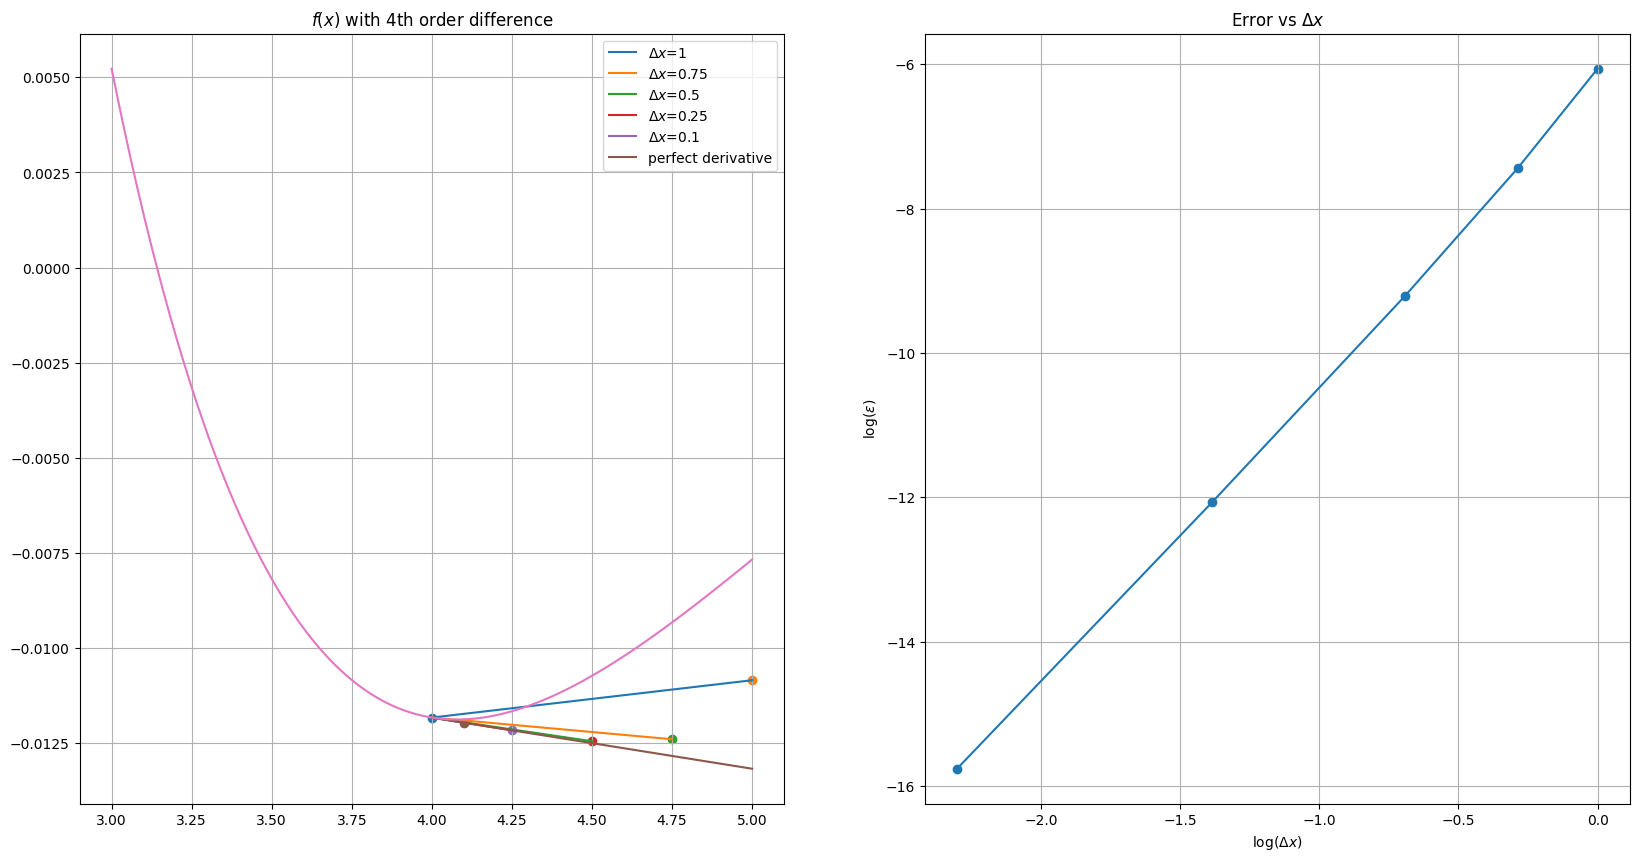

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(x, f(x))
errorli4 = []
for i in range(len(grid)):
    # grid = grid_size[i]
    # xd = x + grid
    # diff = (f(xd) - f(x)) / grid
    diff = fourth_diff(x, f, grid[i])
    yd = f(x) + diff * grid[i]
    error = np.abs(df(x) - diff)
    errorli4.append(error)
    plt.plot([x, x+grid[i]], [f(x), yd], label='$\Delta x$=' + str(grid[i]))
    # plt.arrow(x, f(x), grid[i], diff*grid[i], label='$\Delta x$=' + str(grid[i]), width=2e-10, head_width=2e-10)
    plt.scatter(x+grid[i], yd)
plt.plot([x, x+grid[0]], [f(x), f(x)+df(x)*+grid[0]], label='perfect derivative')
plt.plot(xli, f(xli))
plt.legend()
plt.title("$f(x)$ with 4th order difference")
plt.grid(True)

plt.subplot(122)
plt.plot(np.log(grid), np.log(errorli4))
plt.scatter(np.log(grid), np.log(errorli4))
plt.xlabel("$\log(\Delta x)$")
plt.ylabel("$\log(\epsilon)$")
plt.title("Error vs $\Delta x$")
plt.grid(True)

after all, the log-log plot of the truncated error of corresponding difference type shows:

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\4133083913.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel("$\log(\Delta x)$")
C:\Users\pepii\AppData\Local\Temp\ipykernel_38056\4133083913.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\log(\epsilon)$")


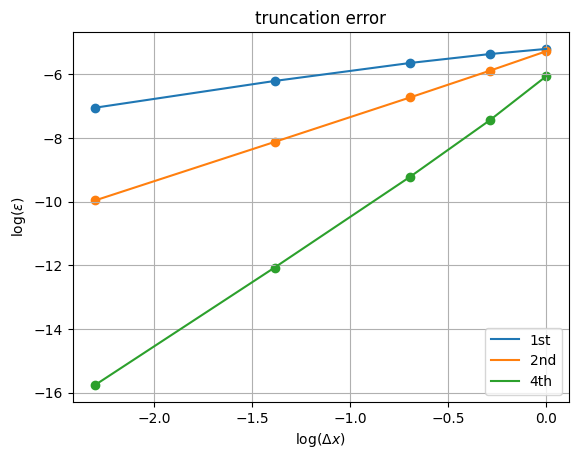

In [37]:
plt.figure()
plt.plot(np.log(grid), np.log(errorli1), label="1st")
plt.scatter(np.log(grid), np.log(errorli1))
plt.plot(np.log(grid), np.log(errorli2), label="2nd")
plt.scatter(np.log(grid), np.log(errorli2))
plt.plot(np.log(grid), np.log(errorli4), label="4th")
plt.scatter(np.log(grid), np.log(errorli4))
plt.xlabel("$\log(\Delta x)$")
plt.ylabel("$\log(\epsilon)$")
plt.title("truncation error")
plt.legend()
plt.grid(True)